In [235]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
# Base directory of the dataset
base_dir = '/content/drive/MyDrive/TextImageClassificationData/TextImageCla_Model_data'

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False, 
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [238]:

train_data = train_datagen.flow_from_directory(
    base_dir + '/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='sparse'
)

val_data = val_test_datagen.flow_from_directory(
    base_dir + '/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='sparse'
)

test_data = val_test_datagen.flow_from_directory(
    base_dir + '/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='sparse',
    shuffle=False
)



Found 105 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,630,723 (21.48 MB)

 Trainable params: 5,630,723 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [240]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3019 - loss: 1.8469 - val_accuracy: 0.3333 - val_loss: 1.1050
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3784 - loss: 1.1097 - val_accuracy: 0.3333 - val_loss: 1.0778
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3456 - loss: 1.0743 - val_accuracy: 0.3667 - val_loss: 1.0409
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3855 - loss: 1.0673 - val_accuracy: 0.4000 - val_loss: 0.9671
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5008 - loss: 1.0302 - val_accuracy: 0.5333 - val_loss: 0.8426
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5591 - loss: 0.9313 - val_accuracy: 0.6667 - val_loss: 0.8417
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5883 - loss: 0.8274 - val_accuracy: 0.4333 - val_loss: 1.2839
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5519 - loss: 0.8823 - val_accuracy: 0.5000 - val_loss: 0.9827
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


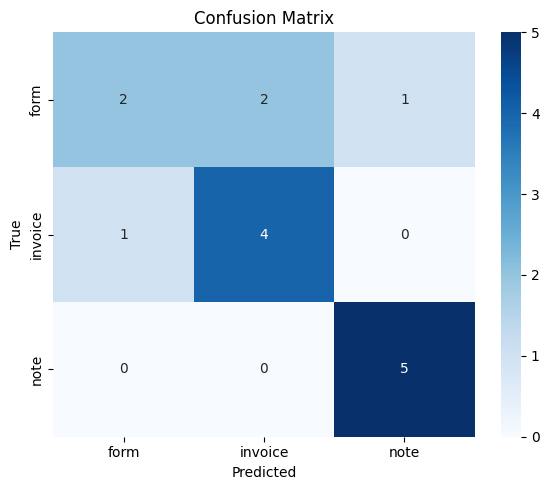

              precision    recall  f1-score   support

        form       0.67      0.40      0.50         5
     invoice       0.67      0.80      0.73         5
        note       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15



In [241]:
# Predict
y_true = test_data.classes
y_probs = model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)

# Confusion Matrix
class_names = list(test_data.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))


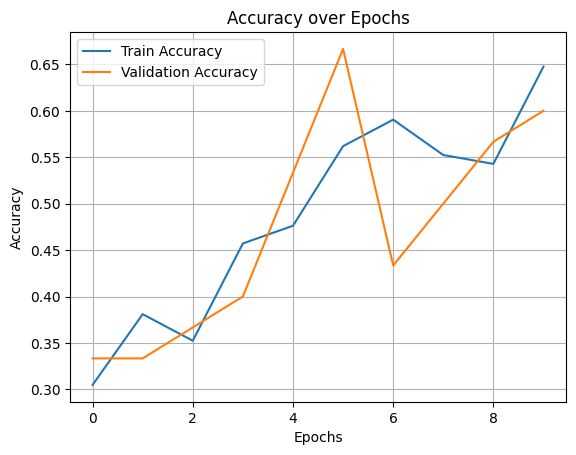

In [242]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")
plt.grid(True)
plt.show()


In [ ]:
import cv2
import numpy as np


#model = load_model('/content/drive/MyDrive/text_classifier1.h5')
class_labels = list(train_data.class_indices.keys())  # ['form', 'invoice', 'note']

def preprocess_single_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))

    # No binarization - keep grayscale details
    normalized = img / 255.0
    reshaped = normalized.reshape(1, 224, 224, 1)
    return reshaped, img  # return grayscale for display

def predict_and_show_image(image_path):
    preprocessed_img, display_img = preprocess_single_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = class_labels[np.argmax(prediction)]

    # Show image with prediction
    plt.imshow(display_img, cmap='gray')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


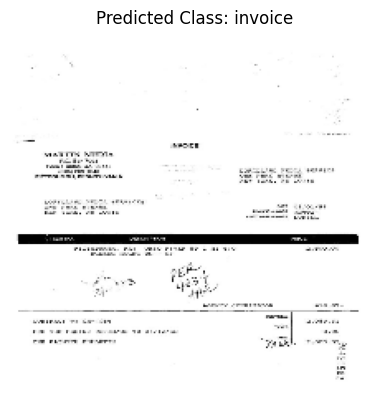

Prediction: invoice


In [251]:
image_path = '/content/drive/MyDrive/TextImageClassificationData/TextImageCla_Model_data/test/invoice/755.jpg'
print("Prediction:", predict_and_show_image(image_path))


In [245]:
#model.save("text_classifier1.h5")


In [ ]:
#import os

# Create a 'model' directory if it doesn't exist
#os.makedirs('Text_classify_model', exist_ok=True)


In [247]:
#model.save('Text_classify_model/text_classifier.h5')